In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
%matplotlib inline

In [2]:
np.random.seed(100)
tf.reset_default_graph()
tf.set_random_seed(100)

In [3]:
from imagenet_classes import class_names

In [4]:
input_shape = [224, 224]

In [5]:
def read_image(image_name):
    data = imread(image_name, mode='RGB')
    image = imresize(data, (input_shape[0], input_shape[1]))
    return image

def display_image(image):
    plt.imshow(image)
    plt.axis('off')

In [6]:
test_image_1 = read_image('test_images/laska.png')

In [7]:
test_image_2 = read_image('test_images/poodle.png')

In [8]:
test_image_3 = read_image('test_images/quail227.JPEG')

In [9]:
test_image_4 = read_image('test_images/dog.png')

In [10]:
test_image_5 = read_image('test_images/dog2.png')

# Input Image Shape

In [11]:
test_image_1.shape

(224, 224, 3)

# Load model weights

In [12]:
vgg_model_weights = np.load('vgg16_weights.npz')
vgg_model_keys = sorted(vgg_model_weights.keys())

for i, k in enumerate(vgg_model_keys):
    print "Index:{0:3}, \tName: {k}, \tShape: {shape}".format(i, k = k, shape = np.shape(vgg_model_weights[k]))

Index:  0, 	Name: conv1_1_W, 	Shape: (3, 3, 3, 64)
Index:  1, 	Name: conv1_1_b, 	Shape: (64,)
Index:  2, 	Name: conv1_2_W, 	Shape: (3, 3, 64, 64)
Index:  3, 	Name: conv1_2_b, 	Shape: (64,)
Index:  4, 	Name: conv2_1_W, 	Shape: (3, 3, 64, 128)
Index:  5, 	Name: conv2_1_b, 	Shape: (128,)
Index:  6, 	Name: conv2_2_W, 	Shape: (3, 3, 128, 128)
Index:  7, 	Name: conv2_2_b, 	Shape: (128,)
Index:  8, 	Name: conv3_1_W, 	Shape: (3, 3, 128, 256)
Index:  9, 	Name: conv3_1_b, 	Shape: (256,)
Index: 10, 	Name: conv3_2_W, 	Shape: (3, 3, 256, 256)
Index: 11, 	Name: conv3_2_b, 	Shape: (256,)
Index: 12, 	Name: conv3_3_W, 	Shape: (3, 3, 256, 256)
Index: 13, 	Name: conv3_3_b, 	Shape: (256,)
Index: 14, 	Name: conv4_1_W, 	Shape: (3, 3, 256, 512)
Index: 15, 	Name: conv4_1_b, 	Shape: (512,)
Index: 16, 	Name: conv4_2_W, 	Shape: (3, 3, 512, 512)
Index: 17, 	Name: conv4_2_b, 	Shape: (512,)
Index: 18, 	Name: conv4_3_W, 	Shape: (3, 3, 512, 512)
Index: 19, 	Name: conv4_3_b, 	Shape: (512,)
Index: 20, 	Name: conv5_1_W,

# Kernel Shape

In [13]:
std_dev = 1e-1
pool_shape = [1, 2, 2, 1]
weights = []

#conv1
conv1_1_kernel_shape = list(vgg_model_weights[vgg_model_keys[0]].shape)
conv1_1_bias_shape = list(vgg_model_weights[vgg_model_keys[1]].shape)

conv1_2_kernel_shape = list(vgg_model_weights[vgg_model_keys[2]].shape)
conv1_2_bias_shape = list(vgg_model_weights[vgg_model_keys[3]].shape)

#conv2
conv2_1_kernel_shape = list(vgg_model_weights[vgg_model_keys[4]].shape)
conv2_1_bias_shape = list(vgg_model_weights[vgg_model_keys[5]].shape)

conv2_2_kernel_shape = list(vgg_model_weights[vgg_model_keys[6]].shape)
conv2_2_bias_shape = list(vgg_model_weights[vgg_model_keys[7]].shape)

#conv3
conv3_1_kernel_shape = list(vgg_model_weights[vgg_model_keys[8]].shape)
conv3_1_bias_shape = list(vgg_model_weights[vgg_model_keys[9]].shape)

conv3_2_kernel_shape = list(vgg_model_weights[vgg_model_keys[10]].shape)
conv3_2_bias_shape = list(vgg_model_weights[vgg_model_keys[11]].shape)

conv3_3_kernel_shape = list(vgg_model_weights[vgg_model_keys[12]].shape)
conv3_3_bias_shape = list(vgg_model_weights[vgg_model_keys[13]].shape)

#conv4
conv4_1_kernel_shape = list(vgg_model_weights[vgg_model_keys[14]].shape)
conv4_1_bias_shape = list(vgg_model_weights[vgg_model_keys[15]].shape)

conv4_2_kernel_shape = list(vgg_model_weights[vgg_model_keys[16]].shape)
conv4_2_bias_shape = list(vgg_model_weights[vgg_model_keys[17]].shape)

conv4_3_kernel_shape = list(vgg_model_weights[vgg_model_keys[18]].shape)
conv4_3_bias_shape = list(vgg_model_weights[vgg_model_keys[19]].shape)

#conv5
conv5_1_kernel_shape = list(vgg_model_weights[vgg_model_keys[20]].shape)
conv5_1_bias_shape = list(vgg_model_weights[vgg_model_keys[21]].shape)

conv5_2_kernel_shape = list(vgg_model_weights[vgg_model_keys[22]].shape)
conv5_2_bias_shape = list(vgg_model_weights[vgg_model_keys[23]].shape)

conv5_3_kernel_shape = list(vgg_model_weights[vgg_model_keys[24]].shape)
conv5_3_bias_shape = list(vgg_model_weights[vgg_model_keys[25]].shape)

#fc1
fc1_w_shape = list(vgg_model_weights[vgg_model_keys[26]].shape)
fc1_b_shape = list(vgg_model_weights[vgg_model_keys[27]].shape)

#fc2
fc2_w_shape = list(vgg_model_weights[vgg_model_keys[28]].shape)
fc2_b_shape = list(vgg_model_weights[vgg_model_keys[29]].shape)

#fc3
fc3_w_shape = list(vgg_model_weights[vgg_model_keys[30]].shape)
fc3_b_shape = list(vgg_model_weights[vgg_model_keys[31]].shape)

# Model

In [14]:
with tf.name_scope('input'):
    X = tf.placeholder(tf.float32, shape = [None, input_shape[0], input_shape[1], 3])
    mean = tf.constant([123.68, 116.779, 103.939], dtype = tf.float32, shape = [1, 1, 1, 3], name = 'image_mean')
    X_centered = X - mean

#conv1
with tf.name_scope('conv1_1'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv1_1_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(X_centered, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv1_1_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv1_1 = tf.nn.relu(output, name = 'conv1_1')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv1_2'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv1_2_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv1_1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv1_2_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv1_2 = tf.nn.relu(output, name = 'conv1_2')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('pool1'):
    pool1 = tf.nn.max_pool(conv1_2, ksize = pool_shape, strides = pool_shape, padding = 'SAME', name = 'pool1')

    
#conv2
with tf.name_scope('conv2_1'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv2_1_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(pool1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv2_1_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv2_1 = tf.nn.relu(output, name = 'conv2_1')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv2_2'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv2_2_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv2_1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv2_2_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv2_2 = tf.nn.relu(output, name = 'conv2_2')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('pool2'):
    pool2 = tf.nn.max_pool(conv2_2, ksize = pool_shape, strides = pool_shape, padding = 'SAME', name = 'pool2')


#conv3
with tf.name_scope('conv3_1'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv3_1_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(pool2, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv3_1_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv3_1 = tf.nn.relu(output, name = 'conv3_1')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv3_2'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv3_2_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv3_1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv3_2_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv3_2 = tf.nn.relu(output, name = 'conv3_2')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv3_3'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv3_3_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv3_2, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv3_3_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv3_3 = tf.nn.relu(output, name = 'conv3_3')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('pool3'):
    pool3 = tf.nn.max_pool(conv3_3, ksize = pool_shape, strides = pool_shape, padding = 'SAME', name = 'pool3')
    

#conv4
with tf.name_scope('conv4_1'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv4_1_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(pool3, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv4_1_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv4_1 = tf.nn.relu(output, name = 'conv4_1')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv4_2'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv4_2_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv4_1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv4_2_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv4_2 = tf.nn.relu(output, name = 'conv4_2')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv4_3'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv4_3_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv4_2, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv4_3_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv4_3 = tf.nn.relu(output, name = 'conv4_3')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('pool4'):
    pool4 = tf.nn.max_pool(conv4_3, ksize = pool_shape, strides = pool_shape, padding = 'SAME', name = 'pool4')
    
    
#conv5
with tf.name_scope('conv5_1'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv5_1_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(pool4, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv5_1_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv5_1 = tf.nn.relu(output, name = 'conv5_1')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv5_2'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv5_2_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv5_1, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv5_2_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv5_2 = tf.nn.relu(output, name = 'conv5_2')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('conv5_3'):
    kernel = tf.Variable(tf.truncated_normal(shape=conv5_3_kernel_shape, dtype = tf.float32, stddev = std_dev), 
                         name = 'weights')
    conv = tf.nn.conv2d(conv5_2, kernel, [1, 1, 1, 1], padding = 'SAME')
    biases = tf.Variable(tf.constant(0.0, shape = conv5_3_bias_shape, dtype=tf.float32), 
                         trainable=True, name = 'biases')
    
    output = tf.nn.bias_add(conv, biases)
    conv5_3 = tf.nn.relu(output, name = 'conv5_3')
    weights.append(kernel)
    weights.append(biases)
    
with tf.name_scope('pool5'):
    pool5 = tf.nn.max_pool(conv5_3, ksize = pool_shape, strides = pool_shape, padding = 'SAME', name = 'pool5')
    

pool5_flat = tf.reshape(pool5, [-1, fc1_w_shape[0]])


#fc1
with tf.name_scope('fc1'):
    fc1_w = tf.Variable(tf.truncated_normal(shape = fc1_w_shape, dtype = tf.float32, stddev = std_dev)
                        , name = 'weights')
    fc1_b = tf.Variable(tf.constant(1.0, shape = fc1_b_shape, dtype=tf.float32),
                       trainable = True, name = 'biases')
    output = tf.nn.bias_add(tf.matmul(pool5_flat, fc1_w), fc1_b)
    fc1 = tf.nn.relu(output)
    weights.append(fc1_w)
    weights.append(fc1_b)
    
    
#fc2
with tf.name_scope('fc2'):
    fc2_w = tf.Variable(tf.truncated_normal(shape = fc2_w_shape, dtype = tf.float32, stddev = std_dev)
                        , name = 'weights')
    fc2_b = tf.Variable(tf.constant(1.0, shape = fc2_b_shape, dtype=tf.float32),
                       trainable = True, name = 'biases')
    output = tf.nn.bias_add(tf.matmul(fc1, fc2_w), fc2_b)
    fc2 = tf.nn.relu(output)
    weights.append(fc2_w)
    weights.append(fc2_b)

    
#fc3
with tf.name_scope('fc3'):
    fc3_w = tf.Variable(tf.truncated_normal(shape = fc3_w_shape, dtype = tf.float32, stddev = std_dev)
                        , name = 'weights')
    fc3_b = tf.Variable(tf.constant(1.0, shape = fc3_b_shape, dtype=tf.float32),
                       trainable = True, name = 'biases')
    output = tf.nn.bias_add(tf.matmul(fc2, fc3_w), fc3_b)
    fc3 = tf.nn.relu(output)
    weights.append(fc3_w)
    weights.append(fc3_b)
    

#eval
with tf.name_scope('eval'):
    predict = tf.nn.softmax(fc3)

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [16]:
with tf.Session() as sess:
    init.run()
    for i, k in enumerate(vgg_model_keys):
        print "Index:{0:3}, \tName: {k}, \tShape: {shape}".format(i, k = k, shape = np.shape(vgg_model_weights[k]))
        sess.run(tf.assign(weights[i], vgg_model_weights[k]))
        pass
    
    saver.save(sess, "./vgg16.ckpt")
    pass

Index:  0, 	Name: conv1_1_W, 	Shape: (3, 3, 3, 64)
Index:  1, 	Name: conv1_1_b, 	Shape: (64,)
Index:  2, 	Name: conv1_2_W, 	Shape: (3, 3, 64, 64)
Index:  3, 	Name: conv1_2_b, 	Shape: (64,)
Index:  4, 	Name: conv2_1_W, 	Shape: (3, 3, 64, 128)
Index:  5, 	Name: conv2_1_b, 	Shape: (128,)
Index:  6, 	Name: conv2_2_W, 	Shape: (3, 3, 128, 128)
Index:  7, 	Name: conv2_2_b, 	Shape: (128,)
Index:  8, 	Name: conv3_1_W, 	Shape: (3, 3, 128, 256)
Index:  9, 	Name: conv3_1_b, 	Shape: (256,)
Index: 10, 	Name: conv3_2_W, 	Shape: (3, 3, 256, 256)
Index: 11, 	Name: conv3_2_b, 	Shape: (256,)
Index: 12, 	Name: conv3_3_W, 	Shape: (3, 3, 256, 256)
Index: 13, 	Name: conv3_3_b, 	Shape: (256,)
Index: 14, 	Name: conv4_1_W, 	Shape: (3, 3, 256, 512)
Index: 15, 	Name: conv4_1_b, 	Shape: (512,)
Index: 16, 	Name: conv4_2_W, 	Shape: (3, 3, 512, 512)
Index: 17, 	Name: conv4_2_b, 	Shape: (512,)
Index: 18, 	Name: conv4_3_W, 	Shape: (3, 3, 512, 512)
Index: 19, 	Name: conv4_3_b, 	Shape: (512,)
Index: 20, 	Name: conv5_1_W,

In [17]:
with tf.Session() as sess:
    saver.restore(sess, "./vgg16.ckpt")
    prediction_probs = sess.run(predict, feed_dict={X: [test_image_1, test_image_2, test_image_3,
                                                       test_image_4, test_image_5]})

INFO:tensorflow:Restoring parameters from ./vgg16.ckpt


In [18]:
prediction_image_1 = np.argsort(prediction_probs[0])[::-1][0:5]
prediction_prob_1 = prediction_probs[0]

In [19]:
prediction_image_2 = np.argsort(prediction_probs[1])[::-1][0:5]
prediction_prob_2 = prediction_probs[1]

In [20]:
prediction_image_3 = np.argsort(prediction_probs[2])[::-1][0:5]
prediction_prob_3 = prediction_probs[2]

In [21]:
prediction_image_4 = np.argsort(prediction_probs[3])[::-1][0:5]
prediction_prob_4 = prediction_probs[3]

In [22]:
prediction_image_5 = np.argsort(prediction_probs[4])[::-1][0:5]
prediction_prob_5 = prediction_probs[4]

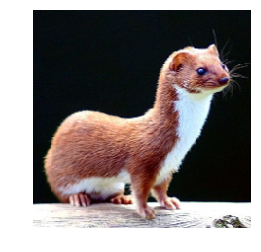

In [23]:
display_image(test_image_1)

In [24]:
image_results_1 = [(class_names[i], prediction_prob_1[i]) for i in prediction_image_1]
print image_results_1

[('weasel', 0.69338548), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.17538856), ('mink', 0.12208532), ('black-footed ferret, ferret, Mustela nigripes', 0.0088706408), ('otter', 0.00012108342)]


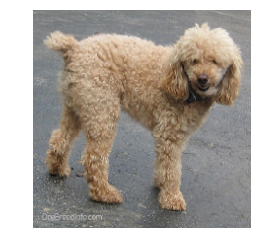

In [25]:
display_image(test_image_2)

In [26]:
image_results_2 = [(class_names[i], prediction_prob_2[i]) for i in prediction_image_2]
print image_results_2

[('miniature poodle', 0.49277839), ('toy poodle', 0.29688498), ('standard poodle', 0.12249858), ('cocker spaniel, English cocker spaniel, cocker', 0.015719928), ('komondor', 0.012951447)]


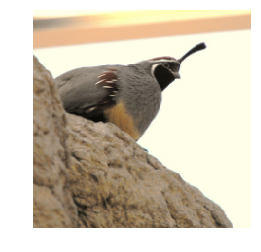

In [27]:
display_image(test_image_3)

In [28]:
image_results_3 = [(class_names[i], prediction_prob_3[i]) for i in prediction_image_3]
print image_results_3

[('quail', 0.9608506), ('chickadee', 0.0058467803), ('water ouzel, dipper', 0.0051507391), ('meerkat, mierkat', 0.0038779648), ('magpie', 0.0035999953)]


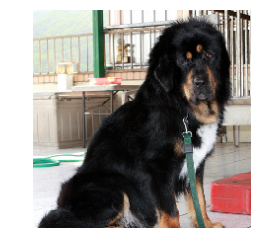

In [29]:
display_image(test_image_4)

In [30]:
image_results_4 = [(class_names[i], prediction_prob_4[i]) for i in prediction_image_4]
print image_results_4

[('Tibetan mastiff', 0.99584949), ('Tibetan terrier, chrysanthemum dog', 0.0039708186), ('Newfoundland, Newfoundland dog', 0.00013736733), ('Bernese mountain dog', 3.0941963e-05), ('Gordon setter', 4.2356564e-06)]


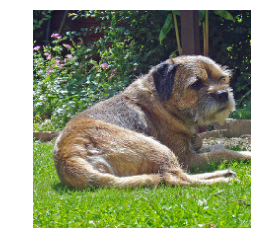

In [31]:
display_image(test_image_5)

In [32]:
image_results_5 = [(class_names[i], prediction_prob_5[i]) for i in prediction_image_5]
print image_results_5

[('Border terrier', 0.75291097), ('Leonberg', 0.098918125), ('patas, hussar monkey, Erythrocebus patas', 0.020060457), ('titi, titi monkey', 0.013495944), ('Norfolk terrier', 0.012439557)]
